In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
wine_df = pd.read_csv("winequality-red.csv")

In [54]:
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#The quality of wine 3 to 8


In [56]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [57]:
print(wine_df["quality"].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


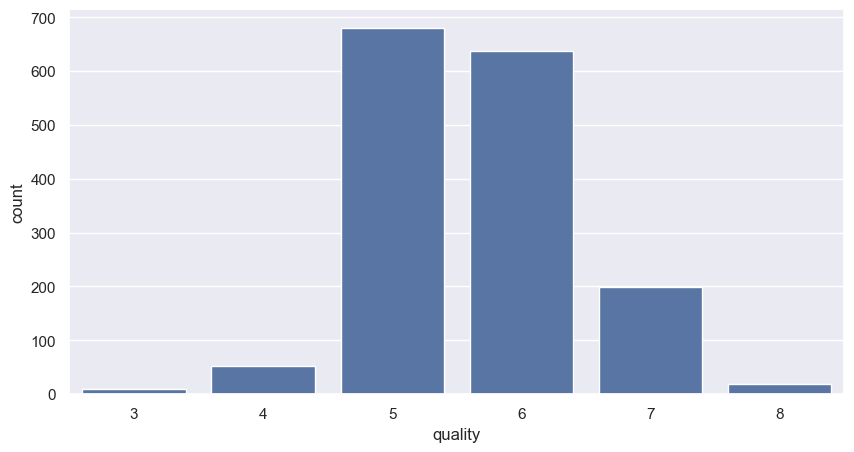

In [58]:
fig = plt.figure(figsize=([10,5]))
sns.countplot(x='quality',data=wine_df)
plt.show()

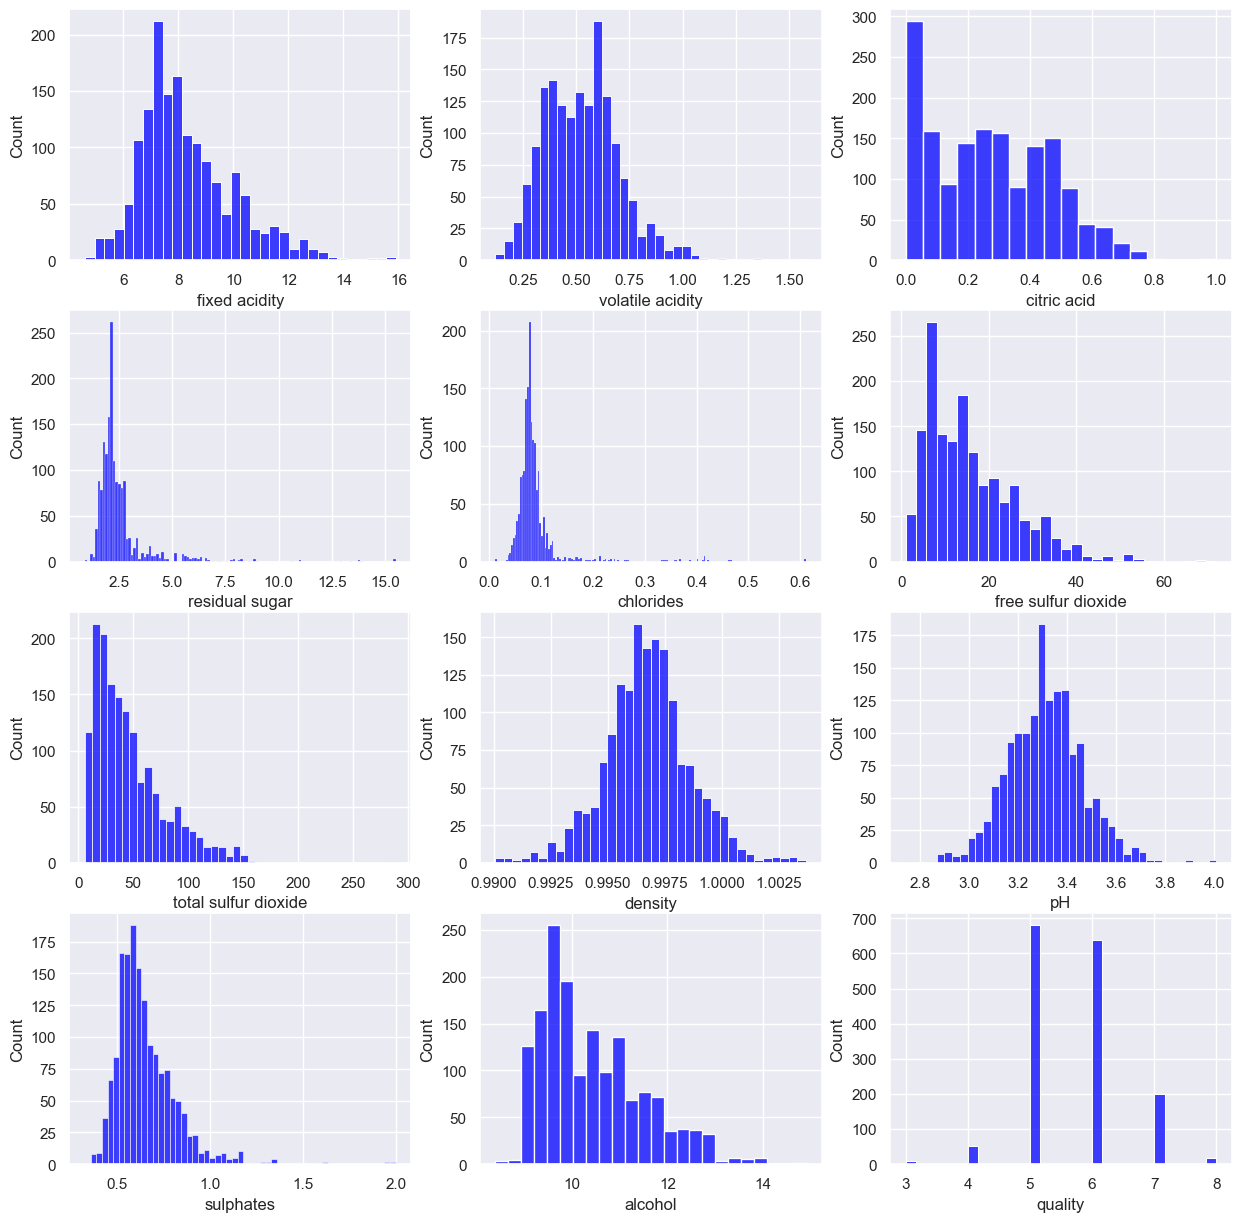

In [59]:
sns.set(style= "darkgrid")
color = sns.color_palette("pastel")

fig , axl = plt.subplots(4,3, figsize=(15,15))
k=0
columns = list(wine_df.columns)
for i in range(4):
    for j in range(3):
        if k < len(columns):
            sns.histplot(wine_df[columns[k]],ax=axl[i][j] , color="blue")
            k+=1
plt.show()

In [60]:
def log_transform(col):
    return np.log1p(col[0])

wine_df["residual sugar"] = wine_df[["residual sugar"]].apply(log_transform, axis=1)
wine_df["chlorides"] = wine_df[["chlorides"]].apply(log_transform, axis=1)
wine_df["free sulfur dioxide"] = wine_df[["free sulfur dioxide"]].apply(log_transform, axis=1)
wine_df["total sulfur dioxide"] = wine_df[["total sulfur dioxide"]].apply(log_transform, axis=1)
wine_df["sulphates"] = wine_df[["sulphates"]].apply(log_transform, axis=1)


C:\Users\Hp\AppData\Local\Temp\ipykernel_10620\2968957767.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(col[0])
C:\Users\Hp\AppData\Local\Temp\ipykernel_10620\2968957767.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(col[0])
C:\Users\Hp\AppData\Local\Temp\ipykernel_10620\2968957767.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(col[0])
C:\Users\Hp\AppData\Local\Temp\ipy

In [61]:
wine_df.corr().sort_values(by='quality',ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality,0.124052,-0.390558,0.226373,0.021687,-0.134818,-0.050344,-0.171419,-0.174919,-0.057731,0.280984,0.476166,1.000000
alcohol,-0.061668,-0.202288,0.109903,0.076381,-0.231967,-0.081808,-0.230553,-0.496180,0.205633,0.114782,1.000000,0.476166
sulphates,0.195163,-0.282193,0.324348,0.015572,0.338225,0.055347,0.059263,0.157096,-0.177952,1.000000,0.114782,0.280984
citric acid,0.671703,-0.552496,1.000000,0.168038,0.201936,-0.087838,-0.002553,0.364947,-0.541904,0.324348,0.109903,0.226373
fixed acidity,1.000000,-0.256131,0.671703,0.163362,0.104151,-0.179551,-0.118225,0.668047,-0.682978,0.195163,-0.061668,0.124052
residual sugar,0.163362,0.020523,0.168038,1.000000,0.055852,0.100081,0.153561,0.405800,-0.091654,0.015572,0.076381,0.021687
free sulfur dioxide,-0.179551,0.013142,-0.087838,0.100081,-0.005570,1.000000,0.784256,-0.039532,0.095520,0.055347,-0.081808,-0.050344
pH,-0.682978,0.234937,-0.541904,-0.091654,-0.269238,0.095520,-0.016021,-0.341699,1.000000,-0.177952,0.205633,-0.057731
chlorides,0.104151,0.068315,0.201936,0.055852,1.000000,-0.005570,0.062192,0.219430,-0.269238,0.338225,-0.231967,-0.134818
total sulfur dioxide,-0.118225,0.073671,-0.002553,0.153561,0.062192,0.784256,1.000000,0.104534,-0.016021,0.059263,-0.230553,-0.171419


In [62]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [63]:
x=wine_df.drop('quality',axis=1)
y=wine_df['quality']

In [64]:
y.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [75]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']


In [76]:
#data balancing 
from imblearn.over_sampling import SMOTE
Oversample= SMOTE(k_neighbors=4)
X_balanced,y_balanced = Oversample.fit_resample(X,y)

In [77]:
y.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split,cross_val_score

def classify(model,x,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    print("Accuracy on training set: {:.3f}".format(model.score(X_train,y_train)))
    print("Accuracy on test set: {:.3f}".format(model.score(X_test,y_test)))
    score=cross_val_score(model,X,y,cv=5)
    print("cross-validation score: {:.3f}+{:.3f}".format(score.mean(),score.std()))    

In [82]:
from sklearn.model_selection import train_test_split
def classify(model,X,y):
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
    model.fit(X_train,y_train)

    return model.score(X_test,y_test)*100

In [83]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model= LogisticRegression()


In [84]:
#DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()


In [85]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()


In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
accuracy_lr = classify(model, X, y)
print("Logistic Regression Accuracy: {:.2f}%",format(accuracy_lr))

LogisticRegression Accuracy: {:.2f}% 56.875


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
accuracy_dtc = classify(model, X, y)
print("Decision Tree Classifier Accuracy: {:.2f}%",format(accuracy_dtc))

Decision Tree Classifier Accuracy: {:.2f}% 56.56250000000001


In [91]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
accuracy_rfc = classify(model, X, y)
print("Logistic Regression Accuracy: {:.2f}%",format(accuracy_rfc))

Logistic Regression Accuracy: {:.2f}% 65.625


C:\Users\Hp\AppData\Local\Temp\ipykernel_10620\1829847260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models,y=accuracy,palette='pastel')


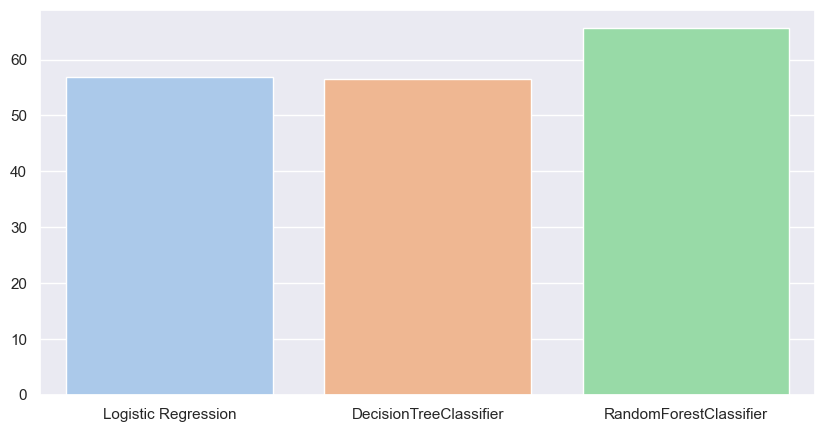

In [92]:
#Ploting the accuracy of all models
models =['Logistic Regression', 'DecisionTreeClassifier','RandomForestClassifier']
accuracy = [accuracy_lr,accuracy_dtc, accuracy_rfc]
plt.figure(figsize=(10,5))
sns.barplot(x=models,y=accuracy,palette='pastel')
plt.show()

In [ ]:
#predict the quality of wine
#inserting new data

model = RandomForestClassifier()
model.fit(x,y)

sample_data = (7.4 , 0.7 , 0 , 1.9 ,0.076 , 11 , 34 ,0.9978 ,3.15 ,0.56 ,9.4 )
sample_data =np.array(sample_data).reshape(1,-1)
predection = model.predict(sample_data)
print("predection wine quality :" ,predection[0])

predection wine quality : 5


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [94]:
#create pickel file
import pickle 
with open('wine_quality_model.pkl' , 'wb') as f:
    pickle.dump(model,f)
    print("model saved as wine_quality_model.pkl")

model saved as wine_quality_model.pkl
